In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sys
import time
import datetime
import copy

sys.path.append("/Users/giovanni/MyPackages/myutils/myutils/")

from myutils import get_info
from myplots import *
from mytools import *

%matplotlib inline
%connect_info


font = {'family' : 'normal',
'size'   : 9}
plt.rc('font', **font)
#plt.rcParams['savefig.dpi']=200


{
  "stdin_port": 51894, 
  "ip": "127.0.0.1", 
  "control_port": 51895, 
  "hb_port": 51896, 
  "signature_scheme": "hmac-sha256", 
  "key": "c6e59175-dcbe-46d5-afbe-0c559fa4a0d7", 
  "kernel_name": "", 
  "shell_port": 51892, 
  "transport": "tcp", 
  "iopub_port": 51893
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/giovanni/Library/Jupyter/runtime/kernel-6472a44e-62c6-4a5f-b034-059ab224abcc.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


/Users/giovanni/MyPackages/sclutils/sclutils/sql/features.py:6: UserWarning: features: These dictionaries have been deprecated. They are maintained in `SCLModels` and can be accesses with `from sclmodels.sql import features`
  warn(w)
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .t

In [2]:
def check_for_nan(df):
    count = 0
    nulllables = []
    for i,j in enumerate(df.columns):
        a = len(df[ df[j].isnull()] )
        b = df[j]==np.inf
        if a!=0:
            count += 1
            nulllables.append(j)
            print j,i
    
    if count!=0:
        print nulllables
        return False
    else:
        return True

# Target selection 

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.set_index('ID', inplace=True)
test.set_index('ID', inplace=True)

print train['target'].value_counts()
N = train['target'].value_counts()[1]
print train.shape[0], train.shape[1]
print test.shape[0], train.shape[1]

1    87021
0    27300
Name: target, dtype: int64
114321 132
114393 132


In [5]:
ids = train.index

In [6]:
savetrain = copy.copy(train)
mask1 = train['target']==1
mask0 = train['target']==0
N = 5000
#train = pd.concat([train[mask1].sample(N), train[mask0].sample(N)])
Y = train['target']
train.drop('target', inplace=True, axis=1)
print train.shape[0], train.shape[1]

114321 131


In [7]:
map_feat = {}
map_feat['ordinal'] = []
map_feat['binary'] = []
map_feat['multicategorical'] = []
map_feat['unary'] = []
map_feat['mixed'] = []
map_feat['continuous'] = []


null = []
for i in train.columns:
    L = len(train[i].unique())
    if L==2:
        map_feat['binary'] += [i]
        print 'binary', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()

    if L>2 and L<10 or train[i].dtype=='O':
        map_feat['multicategorical'] += [i]
        print 'multicategorical', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
    
    if L>=10 and train[i].dtype!='O':
        map_feat['ordinal'] += [i]
        print 'ordinal', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
        
    elif L>=10 and train[i].dtype=='O':
        map_feat['mixed'] += [i]
        print 'mixed', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
        
    elif L>=50 and train[i].dtype!='O':
        map_feat['continuous'] += [i]
        print 'continuous', i, (train[i].isnull()).sum()*100./train.shape[0], len(train[i].unique())
        print 'max', train[i].max(), 'min', train[i].min()
        
    if train[i].isnull().sum()==train.shape[0]:
        null += [i]
    print "\n"

ordinal v1 43.589541729 64488
max 20.0000006294 min -9.99649701427e-07


ordinal v2 43.5580514516 64525
max 19.9999999087 min -9.81761449207e-07


multicategorical v3 3.02394135811 4
max C min inf


ordinal v4 43.5580514516 64525
max 19.9999997446 min -6.47592938974e-07


ordinal v5 42.532867977 65672
max 20.0000003539 min -5.28706773973e-07


ordinal v6 43.589541729 64488
max 20.0000005964 min -9.05509144998e-07


ordinal v7 43.589541729 64490
max 19.9999998141 min -9.46876549674e-07


ordinal v8 42.5284943274 65689
max 20.000000997 min -7.78377810758e-07


ordinal v9 43.6061615976 64452
max 20.0000007502 min -9.82875684434e-07


ordinal v10 0.0734773138793 112486
max 18.5339164478 min -9.87531659989e-07


ordinal v11 43.5930406487 64478
max 20.0000009233 min -1.45906182755e-07


ordinal v12 0.0752267737336 114234
max 18.7105503906 min 5.14322389107e-07


ordinal v13 43.589541729 64489
max 20.0000009059 min -8.46488878755e-07


ordinal v14 0.00349891970854 110473
max 19.9999996125 min

In [8]:
# L = len(map_feat['multicategorical'])
# nrows = L/2 if L%2==0 else (L+1)/2
# fig = plt.figure(figsize=(12, nrows * 6))

# for i,col in enumerate(map_feat['multicategorical']):

#     print col, train[col].notnull().sum()*100./train.shape[0]

#     ax = fig.add_subplot(nrows, 2, i+1)
#     temp = train[col].value_counts()/train.shape[0]
#     ax.bar(range(len(temp)), temp.values, width=0.5, color='r')
#     temp2 = test[col].value_counts()/test.shape[0]
#     ax.bar(np.arange(len(temp2))+0.5, temp2.values,  width=0.5, color='g')
#     ax.set_title(col)

# plt.show()

In [9]:
# L = len(map_feat['mixed'])
# nrows = L/2 if L%2==0 else (L+1)/2
# fig = plt.figure(figsize=(12, nrows * 6))

# for i,col in enumerate(map_feat['mixed']):

#     print col, train[col].notnull().sum()*100./train.shape[0]

#     ax = fig.add_subplot(nrows, 2, i+1)
#     temp = train[col].value_counts()/train.shape[0]
#     ax.bar(range(len(temp)), temp.values, width=0.5, color='r')
#     temp2 = test[col].value_counts()/test.shape[0]
#     ax.bar(np.arange(len(temp2))+0.5, temp2.values,  width=0.5, color='g')
#     ax.set_title(col)

# plt.show()

In [10]:
# L = len(map_feat['ordinal'])
# nrows = L/2 if L%2==0 else (L+1)/2
# fig = plt.figure(figsize=(12, nrows * 6))

# for i,col in enumerate(map_feat['ordinal']):

#     print col, train[col].notnull().sum()*100./train.shape[0]

#     ax = fig.add_subplot(nrows, 2, i+1)
#     try:
#         mini = train[col].min()
#         maxi = train[col].max()
        
#         train[col].plot(kind='hist', ax=ax, range=(mini, maxi), normed=True, histtype='step', lw=2, label='train')
#         test[col].plot(kind='hist', ax=ax, range=(mini, maxi), normed=True, histtype='step', lw=2, label='test')
#         ax.set_title(col)
#     except:
#         pass

# plt.show()

In [11]:
print train.shape
train = train.dropna(axis=0, how='all')
print train.shape
train.head()

(114321, 131)
(114321, 131)


/Users/giovanni/envs/work/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/giovanni/envs/work/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
3,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
8,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v123,v124,v125,v126,v127,v128,v129,v130,v131,sum
ID,,,,,,,,,,,,,,,,,,,,,
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,130
4,False,False,True,False,True,False,False,True,False,True,...,False,True,True,False,False,True,True,False,False,50
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,129
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,130
8,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,29


/Users/giovanni/envs/work/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


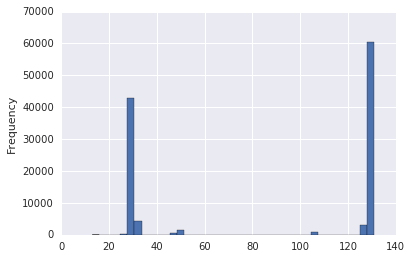

In [12]:
temp = pd.DataFrame()

cols = train.columns.tolist()
for i in cols:
    temp = pd.concat([temp, train[i].notnull()], axis=1)

temp.sum(axis=1).plot(kind='hist', bins=40)
temp['sum'] = temp.sum(axis=1)
temp.head()

In [13]:
print temp.shape[0], train.shape[0] 
train1 = train[temp['sum']>80]
train2 = train[temp['sum']<80]
# train1.to_csv("train1.csv", index_col=0)
# train2.to_csv("train2.csv", index_col=0)

114321 114321


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,1.312911,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,1.575492,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,1.575493,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,1.050328,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


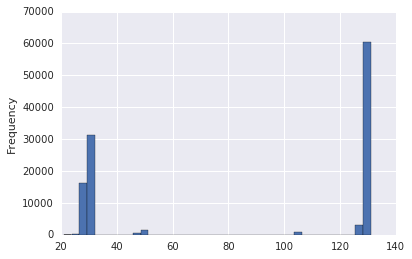

In [14]:
null_dic = {}
temp = pd.DataFrame()

for i in cols:
    temp = pd.concat([temp, test[i].notnull()], axis=1)

temp.sum(axis=1).plot(kind='hist', bins=40)
temp['sum'] = temp.sum(axis=1)
test.head()

In [15]:
test1 = test[temp['sum']>80]
test2 = test[temp['sum']<80]
# test1.to_csv("test1.csv", index_col=0)
# test2.to_csv("test2.csv", index_col=0)

In [16]:
class Processor_ar(object):

    def __init__(self, features_dict, prescaled=False, methods = 'default', onehot=False):

        for i in features_dict.keys():
            setattr(self, i, features_dict[i])

        self.ordinal = self.ordinal 
        self.categorical = self.multicategorical + self.binary
        features = []
        
        for i in features_dict.keys():
            features += features_dict[i]

        self.features = list(set(features))

        if methods == 'default':
            self.methods = {'ordinal': 'mode',
                            'multicategorical': 'mean'}
        else:
            if isinstance(methods, dict):
                self.methods = methods

        self.prescaled = prescaled


    def fit(self, X, Y):

        #X.drop(self.empty + self.date + self.location + self.misc, axis=1, inplace=True)

        pipe = []

        if self.unary:
            X[self.unary] = X[self.unary].fillna(0, axis=0)

        self.means = {}
        self.stds = {}

        if self.prescaled==True:
            for col in self.ordinal:

                mask = X[col].notnull()
                mean = X.ix[mask, col].mean()
                std = X.ix[mask, col].std()
                self.means[col] = mean
                self.stds[col] = std
                if std==0:
                    print "std = 0"
                    self.stds[col] = 1
                    
        else:

            if self.likelihood:
                ordinal_imputer_likelihood = preprocessing.Imputer(self.likelihood, strategy=self.methods['likelihood'])
                pipe += [('ordinal1', ordinal_imputer_likelihood)]
                self.ordinal_imputer_likelihood = ordinal_imputer_likelihood


            if self.continuous:
                ordinal_imputer_continuous = preprocessing.Imputer(self.continuous, strategy=self.methods['continuous'])
                pipe += [('ordinal2', ordinal_imputer_continuous)]
                self.ordinal_imputer_continuous = ordinal_imputer_continuous


            if self.ordinal:
                ordinal_imputer_ordinal = preprocessing.Imputer(self.ordinal, strategy=self.methods['ordinal'])
                pipe += [('ordinal3', ordinal_imputer_ordinal)]
                self.ordinal_imputer_ordinal = ordinal_imputer_ordinal


        if self.onehot==False:
            categorical_encoder = sclmodels.preprocessing.CategoricalEncoder(
            self.multicategorical + self.binary, scheme=self.methods['multicategorical'], log_centre=True, min_category_size=10, map_nulls=True
        )
            pipe += [('categorical_encoder', categorical_encoder)]
            self.pipe = Pipeline(pipe)
            self.categorical_encoder = categorical_encoder

        else:
            categorical_encoder = sclmodels.preprocessing.CategoricalEncoder(
            self.multicategorical, scheme="mean", log_centre=True, min_category_size=10, map_nulls=True
        )
            if self.binary:
                onehotencoder = sclmodels.preprocessing.OneHotEncoder(self.binary, map_nulls=True)

            pipe += [('onehotencoder', onehotencoder)]

            self.pipe = Pipeline(pipe)

        X = self.pipe.fit_transform(X, Y)

    def fit_transform(self, X, Y):

        #X.drop(self.empty + self.date + self.location + self.misc, axis=1, inplace=True)
        pipe = []

        if self.unary:
            X[self.unary] = X[self.unary].fillna(0, axis=0)

        self.means = {}
        self.stds = {}
        if self.prescaled==True:

            for col in self.ordinal:

                mask = X[col].notnull()
                mean = X.ix[mask, col].mean()
                std = X.ix[mask, col].std()
                self.means[col] = mean
                self.stds[col] = std
                if std==0:
                    self.stds[col] = 1             
                X.ix[mask, col] = (X.ix[mask, col] - self.means[col])/self.stds[col]
                X[col].fillna(0, inplace=True)

        else:


            if self.likelihood:
                ordinal_imputer_likelihood = preprocessing.Imputer(self.likelihood,self.methods['likelihood'])
                pipe += [('ordinal1', ordinal_imputer_likelihood)]
                self.ordinal_imputer_likelihood = ordinal_imputer_likelihood


            if self.continuous:
                ordinal_imputer_continuous = preprocessing.Imputer(self.continuous, strategy=self.methods['continuous'])
                pipe += [('ordinal2', ordinal_imputer_continuous)]
                self.ordinal_imputer_continuous = ordinal_imputer_continuous


            if self.ordinal:
                ordinal_imputer_ordinal = preprocessing.Imputer(self.ordinal, strategy=self.methods['ordinal'])
                pipe += [('ordinal3', ordinal_imputer_ordinal)]
                self.ordinal_imputer_ordinal = ordinal_imputer_ordinal


        categorical_encoder = sclmodels.preprocessing.CategoricalEncoder( self.multicategorical + self.binary, 
                                                                         scheme=self.methods['multicategorical'], 
                                                                         log_centre=False, min_category_size=10, 
                                                                         map_nulls=True )
        pipe += [('categorical_encoder', categorical_encoder)]
        self.pipe = Pipeline(pipe)
        self.categorical_encoder = categorical_encoder

        X = self.pipe.fit_transform(X, Y)

        return X

    def transform(self, X):

        #X.drop(self.empty + self.date + self.location + self.misc, axis=1)

        if self.unary:
            X[self.unary] = X[self.unary].fillna(0, axis=0)

        if self.prescaled==True:

            for col in self.ordinal:

                mask = X[col].notnull()
                X.ix[mask, col] = (X.ix[mask, col] - self.means[col])/self.stds[col]
                X[col].fillna(0, inplace=True)

        X = self.pipe.transform(X)

        return X


In [17]:
train = train1
Y = pd.DataFrame(Y, index=Y.index, columns=['target'])
Y.head()

,target
ID,
3,1
4,1
5,1
6,1
8,1


In [18]:
train = train1.join(Y, how='left')
Y = Y.loc[train.index]
mask1 = train['target']==1
mask0 = train['target']==0
train = pd.concat([train[mask1].sample(N), train[mask0].sample(N)])
Y = train['target']
train.drop('target', axis=1, inplace=True)

In [19]:
processor = Processor_ar(map_feat, prescaled=True)
X = processor.fit_transform(train, Y)
scaler = StandardScaler()
X.ix[:, processor.categorical] = scaler.fit_transform(X[processor.categorical])

In [20]:
processor.categorical

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v62',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [21]:
check_for_nan(X)

True

In [22]:
leftout = savetrain[~savetrain.index.isin(train.index)]
leftout.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [23]:
Y_leftout = leftout['target']
leftout.drop('target', axis=1, inplace=True)
X_leftout = processor.transform(leftout)
X_leftout.ix[:, processor.categorical] = scaler.transform(X_leftout[processor.categorical])

/Users/giovanni/envs/work/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/giovanni/envs/work/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/giovanni/envs/work/lib/python2.7/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

# Build the model

In [24]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from collections import OrderedDict
from sklearn.cross_validation import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from evolutionary_search import EvolutionaryAlgorithmSearchCV

In [25]:
params = {'n_estimators': 160,
          'learning_rate': 0.07,
          'max_depth': 5,
          'min_samples_leaf': 9,
          'subsample': 0.5,
          'verbose': 0}

clf = GradientBoostingClassifier(**params)
params = {'n_estimators': 160,
          'learning_rate': 0.07,
          'max_depth': 5,
          'subsample': 0.5}

clf2 = XGBClassifier(**params)
clf3 = LogisticRegression(solver='lbfgs')

models = zip(['GBC', 'XGB'], [clf, clf2])

117


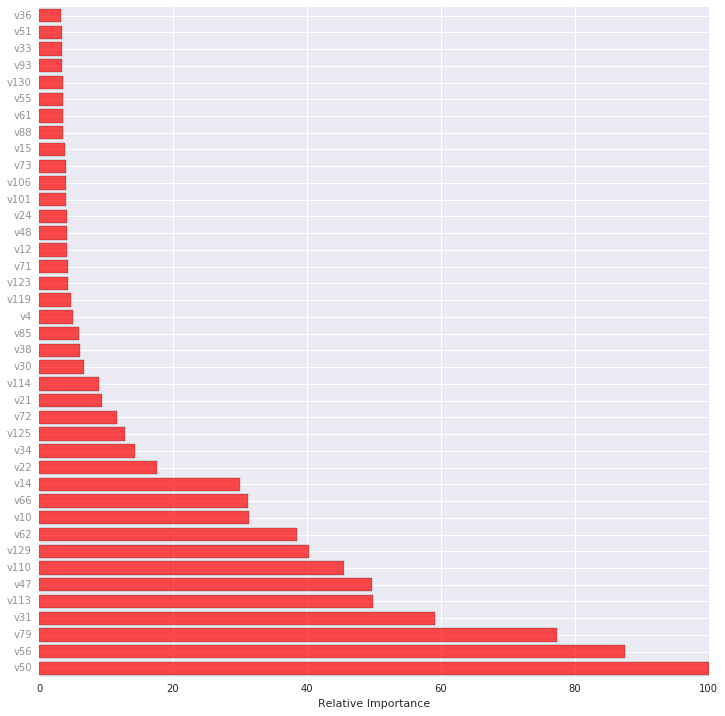

In [26]:
kf = StratifiedKFold( Y, n_folds = 10)
anovafeat = feature_anova(clf, X, Y, n_perc=90)
print len(anovafeat)

In [27]:
clf.fit(X[anovafeat], Y)

GradientBoostingClassifier(init=None, learning_rate=0.07, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=9, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=160,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

115


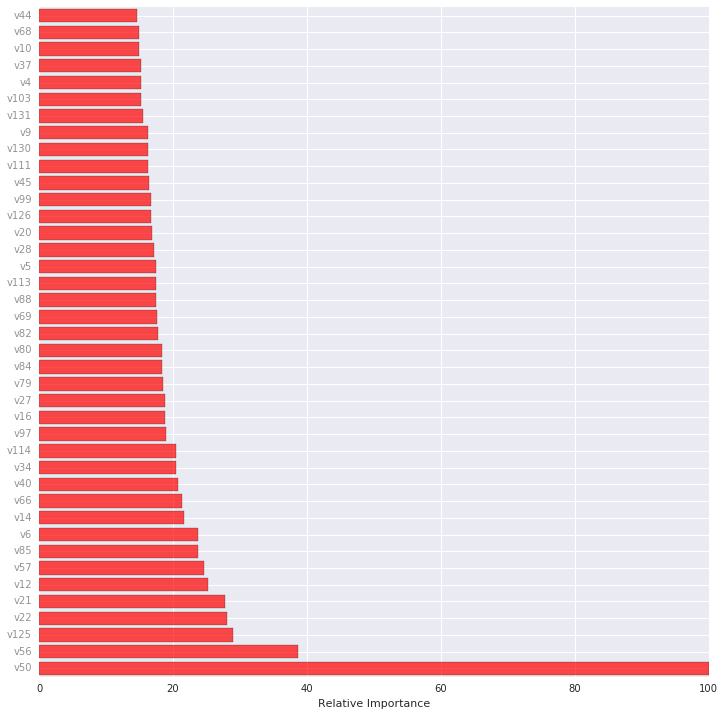

In [28]:
feat1 = plot_feature_importances(clf, anovafeat, n_features=40, threshold=1, append_name='_gbc')
print len(feat1)

In [29]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV

paramgrid = { 
            "max_depth": np.arange(3, 10, 1),
            "learning_rate": [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
            "n_estimators": [int(est) for est in np.linspace(100,400,num=20)],
            "subsample" : [0.4, 0.5, 0.6, 0.7, 0.8],
             }


gbc = GradientBoostingClassifier()
model = gbc
model = XGBClassifier()
cv = EvolutionaryAlgorithmSearchCV(estimator=model,
                                  params=paramgrid,
                                  scoring="log_loss",
                                  cv=StratifiedKFold(Y, n_folds=5),
                                  verbose=True,
                                  population_size=50,
                                  tournament_size=3,
                                  gene_crossover_prob=0.5,
                                  generations_number=10, n_jobs=1)

# cv.fit(X[feat1], Y)
# print cv.best_params_

# import pickle
# pickle.dump(cv.best_params_, open("best_params-1.pkl", "wb"))
# np.random.randint(10, size=10)

In [30]:
params_ = {'n_estimators': 242, 'subsample': 0.7, 'learning_rate': 0.05, 'max_depth': 5}
est = XGBClassifier(**params_)

In [31]:
binary_classif_metrics = ['log_loss', 'accuracy', 'precision']
scores = {}
for i in binary_classif_metrics:
    scores[i] = cross_val_score(clf, X[feat1], Y, n_jobs=1, cv = kf, scoring=i)
    print 'Mean ', i, ' = ', scores[i].mean(), 'std = ', scores[i].std()

Mean  log_loss  =  -0.612182300728 std =  0.0132008453774
Mean  accuracy  =  0.6535 std =  0.0206118897727
Mean  precision  =  0.66330152582 std =  0.0135568353985


In [33]:
binary_classif_metrics = ['log_loss', 'accuracy', 'precision']
scores = {}
for i in binary_classif_metrics:
    scores[i] = cross_val_score(est, X[feat1].as_matrix(), Y.values, n_jobs=1, cv = kf, scoring=i)
    print 'Mean ', i, ' = ', scores[i].mean(), 'std = ', scores[i].std()

Mean  log_loss  =  -0.604420233068 std =  0.0139194148687
Mean  accuracy  =  0.6639 std =  0.0122837290755
Mean  precision  =  0.669779832899 std =  0.0137801027261


In [34]:
a = {}; b = {}; c = {}
cvpred = pd.DataFrame(index=ids)
for imodel, model in models:
    cvpred['pred%s'%imodel] = np.nan
    Y_score = OrderedDict(); Yte = OrderedDict(); Y_pred = OrderedDict(); Wte = OrderedDict(); i=0
    print imodel
    for train_index, test_index in kf:
        Xtr, Xte = X.iloc[train_index,:], X.iloc[test_index,:]
        Ytr, Yte[i] = Y.iloc[train_index], Y.iloc[test_index]

        try:
            model.fit(Xtr[feat1].as_matrix(), Ytr)
        except:
            model.fit(Xtr[feat1].as_matrix(), Ytr)
        Y_score[i] = model.predict_proba(Xte[feat1].as_matrix())[:,1]
        print Xte.index.shape[0], len(Y_score[i])
        Y_pred[i] = model.predict(Xte[feat1].as_matrix())   
        i+=1
    a[imodel] = np.array([i for k in Yte.keys() for i in Yte[k]])
    b[imodel] = np.array([i for k in Y_score.keys() for i in Y_score[k]])
    c[imodel] = np.array([i for k in Y_pred.keys() for i in Y_pred[k]])

GBC
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
XGB
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000
1000 1000


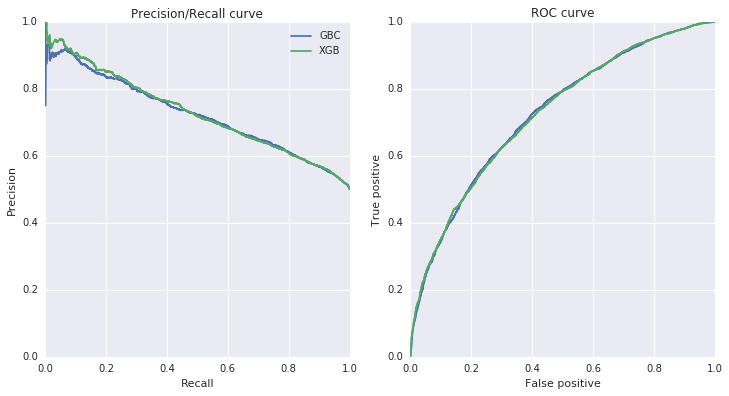

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
for imodel, model in models:
    precision, recall, th = precision_recall_curve(a[imodel], b[imodel])
    ax[0].plot(recall, precision, label=imodel)
ax[0].set_ylim((0,1))
ax[0].set_xlabel("Recall")
ax[0].set_ylabel("Precision")
ax[0].set_title("Precision/Recall curve")
ax[0].legend(loc='best')

for imodel, model in models:
    fpr, tpr, threshold = roc_curve(a[imodel], b[imodel])
    ax[1].plot(fpr, tpr, label=imodel)
ax[1].set_xlabel("False positive")
ax[1].set_ylabel("True positive")
ax[1].set_title("ROC curve")

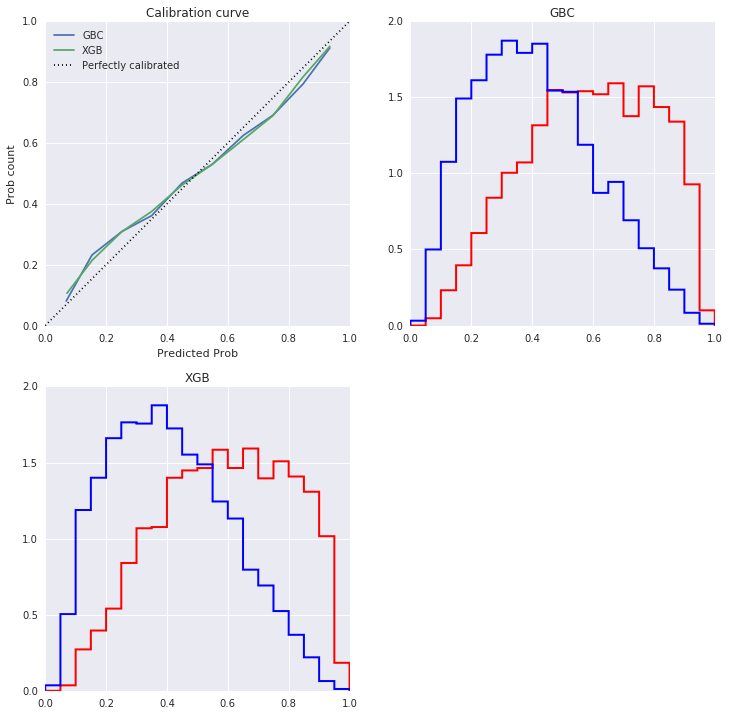

In [36]:
nrows = len(models)/2 + 1
fig = plt.figure(figsize=(12, nrows * 6))
ax = fig.add_subplot(nrows, 2, 1)

for imodel, model in models:
    prob_true, prob_pred  = calibration_curve(a[imodel], b[imodel], normalize=True, n_bins=10)
    ax.plot(prob_pred, prob_true, label=imodel)
    ax.set_xlabel("Predicted Prob")
    ax.set_ylabel("Prob count")
    ax.set_title("Calibration curve")
ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax.legend(loc='best')

i = 2
for imodel, model in models:
    ax = fig.add_subplot(nrows, 2, i)
    ax.hist(b[imodel][a[imodel]==1], bins = 20, range=(0,1), color='r', histtype='step', linewidth=2, label='1', normed=True)
    ax.hist(b[imodel][a[imodel]==0], bins = 20, range=(0,1), color='b', histtype='step', linewidth=2, label='0', normed=True)    
    ax.set_xlim((0,1))
    ax.set_title(imodel)
    i+=1

# Etrapolate

In [ ]:
clf2.fit(X[feat1], Y, sample_weight=bias.weights)

In [ ]:
pred = clf2.predict_proba(X_test[feat1])[:,1]

submit = pd.DataFrame(pred, index=test.index, columns=['TARGET'])

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submit.csv', index_col=0)

In [ ]:
bias.weights